# pytransform3d

<a href="https://colab.research.google.com/github/LinkHS/Colab/blob/main/3D_tools/pytransform3d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install pytransform3d

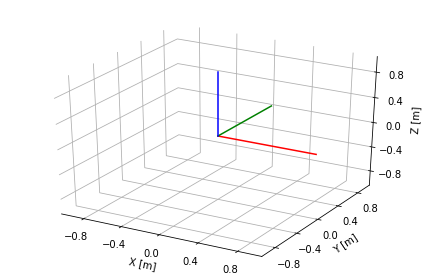

In [4]:
import matplotlib.pyplot as plt
from pytransform3d.transformations import plot_transform
from pytransform3d.plot_utils import make_3d_axis

ax = make_3d_axis(ax_s=1, unit="m", n_ticks=6)
plot_transform(ax=ax)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


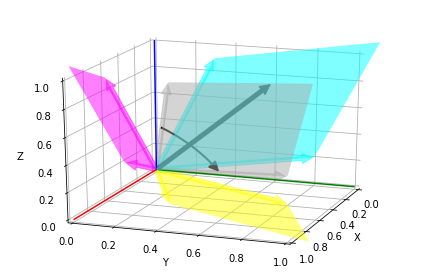

In [6]:
import numpy as np
import pytransform3d.rotations as pr

a = np.array([0.6, 0.3, 0.9])
b = np.array([0.4, 0.8, 0.2])

ax = pr.plot_basis()
pr.plot_bivector(ax=ax, a=a, b=b)
ax.view_init(azim=20, elev=20)
ax.set_xlim((0, 1))
ax.set_ylim((0, 1))
ax.set_zlim((0, 1))
plt.tight_layout()
plt.show()

## Construct Rotation Matrix from Two Vectors
We compute rotation matrix from two vectors that form a plane. The x-axis will point in the same direction as the first vector, the y-axis corresponds to the normalized vector rejection of b on a, and the z-axis is the cross product of the other basis vectors.

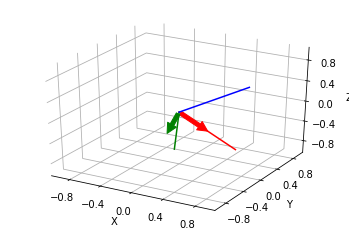

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from pytransform3d.rotations import (matrix_from_two_vectors, plot_basis, random_vector)
from pytransform3d.plot_utils import plot_vector


random_state = np.random.RandomState(1)
a = random_vector(random_state, 3) * 0.3
b = random_vector(random_state, 3) * 0.3
R = matrix_from_two_vectors(a, b)

ax = plot_vector(direction=a, color="r")
plot_vector(ax=ax, direction=b, color="g")
plot_basis(ax=ax, R=R)
plt.show()

## Quaternion Integration
Integrate angular velocities to a sequence of quaternions.

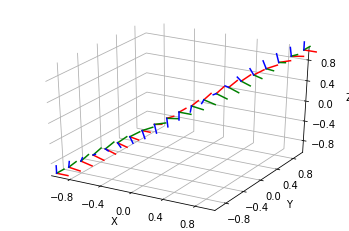

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from pytransform3d.rotations import (
    quaternion_integrate, matrix_from_quaternion, plot_basis)


angular_velocities = np.empty((21, 3))
angular_velocities[:, :] = np.array([np.sqrt(0.5), np.sqrt(0.5), 0.0])
angular_velocities *= np.pi

Q = quaternion_integrate(angular_velocities, dt=0.1)
ax = None
for t in range(len(Q)):
  R = matrix_from_quaternion(Q[t])
  p = 2 * (t/(len(Q) - 1) - 0.5) * np.ones(3)
  ax = plot_basis(ax=ax, s=0.15, R=R, p=p)
plt.show()